In [1]:
import pandas as pd
import altair as alt
from vega_datasets import data

In [2]:
#pd.set_option('display.max_columns', 50)
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [3]:
df = pd.read_csv('../data/train_data.zip')

In [4]:
df.head()

external_id  month  year  monthly_number_of_sessions  \
0     1900203      3  2019                           0   
1     1900203      6  2018                           0   
2     1900203      8  2018                           0   
3  MR00101775      1  2019                           0   
4  MR00101775      8  2019                           0   

   monthly_unique_sessions  monthly_repeated_sessions  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   monthly_avg_length_of_session  monthly_avg_light_activity  \
0                            0.0                         0.0   
1                            0.0                         0.0   
2                            0.0                         0.0   
3                            0.0                         0.0   
4                            0.0                         0.0   

   monthly_avg_moderate_activity  monthly_avg_vigorous_activity  ...  \
0                            0.0                            0.0  ...   
1                            0.0                            0.0  ...   
2                            0.0                            0.0  ...   
3                            0.0                            0.0  ...   
4                            0.0                            0.0  ...   

   avg_wind_9_10  avg_wind_10_11  avg_wind_11_12  avg_wind_12_above  \
0            0.0             0.0             0.0                0.0   
1            0.0             0.0             0.0                0.0   
2            0.0             0.0             0.0                0.0   
3            0.0             0.0             0.0                0.0   
4            0.0             0.0             0.0                0.0   

   perfect_days  unacast_session_count     hpi  \
0           0.0                   78.0  323.61   
1           4.0                  111.0  323.61   
2           2.0                  110.0  323.61   
3           0.0                   10.0  110.38   
4           0.0                   11.0  110.38   

   state_and_local_amount_per_capita  state_amount_per_capita  \
0                           0.132207                 0.018519   
1                           0.132207                 0.018519   
2                           0.132207                 0.018519   
3                           0.076247                 0.011966   
4                           0.076247                 0.011966   

   local_amount_per_capita  
0                 0.113688  
1                 0.113688  
2                 0.113688  
3                 0.064281  
4                 0.064281  

[5 rows x 861 columns]

In [5]:
# Select primary key and neighbourhood columns
df_neigh = df.iloc[:, 498:673]
df_neigh['unacast_session_count'] = df['unacast_session_count']
df_neigh['external_id'] = df['external_id']
df_neigh['month'] = df['month']
df_neigh['year'] = df['year']

longitude      latitude  num_places_within_800m  \
count  50120.000000  50120.000000            50120.000000   
mean     -94.077363     37.187360                5.478053   
std       16.957781      5.510698               16.407796   
min     -159.453325     19.946012                0.000000   
25%     -104.749532     33.438206                0.000000   
50%      -90.204211     38.286102                1.000000   
75%      -81.564740     41.520402                5.000000   
max      -69.630681     65.701927              403.000000   

       closest_place_distance       alcohol       amenity        bakery  \
count            32620.000000  50120.000000  50120.000000  50120.000000   
mean               282.642262      0.034717      0.692737      0.039904   
std                175.116782      0.252666      2.208202      0.334272   
min                  4.335518      0.000000      0.000000      0.000000   
25%                128.890891      0.000000      0.000000      0.000000   
50%                261.621104      0.000000      0.000000      0.000000   
75%                422.101844      0.000000      1.000000      0.000000   
max                738.934461      5.000000     40.000000      9.000000   

               bank           bar          cafe  ...       robbery  \
count  50120.000000  50120.000000  50120.000000  ...  50100.000000   
mean       0.118516      0.138867      0.153631  ...     75.633134   
std        0.605185      1.386253      1.012276  ...     90.268031   
min        0.000000      0.000000      0.000000  ...      0.000000   
25%        0.000000      0.000000      0.000000  ...     12.600000   
50%        0.000000      0.000000      0.000000  ...     45.500000   
75%        0.000000      0.000000      0.000000  ...     98.000000   
max       10.000000     44.000000     28.000000  ...    836.800000   

       aggravated_assault  property_crime      burglary  larceny_theft  \
count        50100.000000    50100.000000  50100.000000   50100.000000   
mean           212.057565     2064.488982    324.918363    1536.409062   
std            228.193676     1430.420253    268.583928    1078.456809   
min              0.000000        0.000000      0.000000       0.000000   
25%             54.900000      980.900000    128.000000     744.300000   
50%            152.700000     1910.000000    275.100000    1410.100000   
75%            283.500000     2870.300000    435.800000    2076.200000   
max           1747.500000    12004.700000   2369.900000    9078.800000   

       motor_vehicle_theft  houses_per_sq_km  unacast_session_count  \
count         50100.000000      50120.000000           49503.000000   
mean            206.936846        593.441658             136.487001   
std             203.904235       1383.119014             536.476769   
min               0.000000          0.000000               1.000000   
25%              58.900000         88.373704              25.000000   
50%             143.600000        325.532644              58.000000   
75%             308.800000        693.158137             124.000000   
max            1645.700000      24997.348010           44860.000000   

              month          year  
count  50120.000000  50120.000000  
mean       6.100000   2018.450000  
std        3.080615      0.497499  
min        1.000000   2018.000000  
25%        3.750000   2018.000000  
50%        6.000000   2018.000000  
75%        8.250000   2019.000000  
max       12.000000   2019.000000  

[8 rows x 170 columns]

In [6]:
# Reorder columns so `external_id`, `month` & `year` come first
cols = df_neigh.columns.tolist()
cols = cols[-3:] + cols[:-3]
df_neigh = df_neigh[cols]

In [7]:
# Drop unnecessary columns
df_neigh = df_neigh.drop('country', axis=1)

In [8]:
# Calculate percentage of missing values
missing = df_neigh.isna()
num_missing = missing.sum().sort_values(ascending=False)
prop_missing = num_missing / df_neigh.shape[0]
df_prop_missing = prop_missing.to_frame().reset_index()
df_prop_missing = df_prop_missing.rename(columns={'index':'col_name', 0:'prop'})

In [9]:
prop_missing[50:60]

streets_per_node_counts_2_osid        0.096169
streets_per_node_proportion_2_osid    0.096169
streets_per_node_proportion_3_osid    0.096169
streets_per_node_counts_3_osid        0.096169
m_osid                                0.095770
self_loop_proportion_osid             0.095770
edge_length_avg_osid                  0.095770
streets_per_node_proportion_1_osid    0.095770
streets_per_node_counts_0_osid        0.095770
circuity_avg_osid                     0.095770
dtype: float64

In [10]:
df_prop_missing.head()

col_name  prop
0  clean_intersection_density_km   1.0
1                node_density_km   1.0
2  clean_intersection_count_osid   1.0
3           node_density_km_osdw   1.0
4   intersection_density_km_osdw   1.0

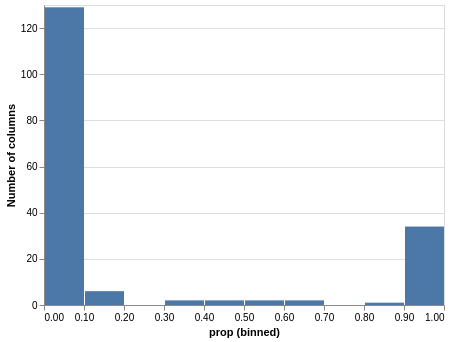

In [11]:
# Distribution of proportion of missing values
alt.Chart(df_prop_missing).mark_bar().encode(
    alt.X('prop:Q', bin=True),
    alt.Y('count()', title='Number of columns')
)

In [12]:
# Identify columns missing more than 20% 
df_prop_missing.query('prop > 0.2')

col_name      prop
0        clean_intersection_density_km  1.000000
1                      node_density_km  1.000000
2        clean_intersection_count_osid  1.000000
3                 node_density_km_osdw  1.000000
4         intersection_density_km_osdw  1.000000
5               street_density_km_osid  1.000000
6                 edge_density_km_osid  1.000000
7         intersection_density_km_osid  1.000000
8                 node_density_km_osid  1.000000
9                 edge_density_km_osdw  1.000000
10              street_density_km_osdw  1.000000
11            clean_intersection_count  1.000000
12       clean_intersection_count_osdw  1.000000
13  clean_intersection_density_km_osdw  1.000000
14                   street_density_km  1.000000
15                     edge_density_km  1.000000
16             intersection_density_km  1.000000
17  clean_intersection_density_km_osid  1.000000
18           streets_per_node_counts_8  0.999202
19       streets_per_node_proportion_8  0.999202
20  streets_per_node_proportion_7_osid  0.998005
21      streets_per_node_counts_7_osid  0.998005
22  streets_per_node_proportion_8_osdw  0.995611
23      streets_per_node_counts_8_osdw  0.995611
24       streets_per_node_proportion_7  0.993216
25           streets_per_node_counts_7  0.993216
26      streets_per_node_counts_7_osdw  0.987630
27  streets_per_node_proportion_7_osdw  0.987630
28  streets_per_node_proportion_6_osid  0.959298
29      streets_per_node_counts_6_osid  0.959298
30       streets_per_node_proportion_6  0.939346
31           streets_per_node_counts_6  0.939346
32      streets_per_node_counts_6_osdw  0.907821
33  streets_per_node_proportion_6_osdw  0.907821
34                       transit_score  0.822825
35  streets_per_node_proportion_5_osid  0.625299
36      streets_per_node_counts_5_osid  0.625299
37           streets_per_node_counts_5  0.529529
38       streets_per_node_proportion_5  0.529529
39  streets_per_node_proportion_5_osdw  0.485235
40      streets_per_node_counts_5_osdw  0.485235
41              closest_place_category  0.349162
42              closest_place_distance  0.349162

What are the clean variables?


In [13]:
# Summary of number of places of interest near playgrounds
df_unique = df_neigh.query("month == 2 & year == 2019")
df_unique.loc[:, 'alcohol':'tourism'].describe()

alcohol      amenity       bakery         bank          bar  \
count  2506.000000  2506.000000  2506.000000  2506.000000  2506.000000   
mean      0.034717     0.692737     0.039904     0.118516     0.138867   
std       0.252714     2.208621     0.334336     0.605300     1.386515   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     1.000000     0.000000     0.000000     0.000000   
max       5.000000    40.000000     9.000000    10.000000    44.000000   

              cafe    camp_site   car_repair    childcare  clothes_store  ...  \
count  2506.000000  2506.000000  2506.000000  2506.000000    2506.000000  ...   
mean      0.153631     0.005188     0.041500     0.006784       0.085794  ...   
std       1.012468     0.091413     0.270789     0.086826       0.861358  ...   
min       0.000000     0.000000     0.000000     0.000000       0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000       0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000       0.000000  ...   
75%       0.000000     0.000000     0.000000     0.000000       0.000000  ...   
max      28.000000     3.000000     5.000000     2.000000      21.000000  ...   

          pharmacy  picnic_site  place_of_worship       police  post_office  \
count  2506.000000  2506.000000       2506.000000  2506.000000  2506.000000   
mean      0.048683     0.027534          0.655626     0.039505     0.069832   
std       0.278333     0.301096          1.515299     0.208683     0.270122   
min       0.000000     0.000000          0.000000     0.000000     0.000000   
25%       0.000000     0.000000          0.000000     0.000000     0.000000   
50%       0.000000     0.000000          0.000000     0.000000     0.000000   
75%       0.000000     0.000000          1.000000     0.000000     0.000000   
max       4.000000     8.000000         18.000000     3.000000     2.000000   

        restaurant         shop  supermarket  swimming_pool      tourism  
count  2506.000000  2506.000000  2506.000000    2506.000000  2506.000000  
mean      0.622506     0.644852     0.096967       0.057861     0.169194  
std       3.448676     2.807171     0.449190       0.637050     1.168492  
min       0.000000     0.000000     0.000000       0.000000     0.000000  
25%       0.000000     0.000000     0.000000       0.000000     0.000000  
50%       0.000000     0.000000     0.000000       0.000000     0.000000  
75%       0.000000     0.000000     0.000000       0.000000     0.000000  
max      98.000000    52.000000     8.000000      14.000000    33.000000  

[8 rows x 37 columns]

In [27]:
# checking how many playgrounds dont have any form of amenity near them
(df_unique.loc[:, 'alcohol':'tourism'].sum(axis=1)==0).sum()

875

In [39]:
#correlation of type of amenity with target
df_amen = df.loc[:,list(df_unique.columns[10:47])].join(df.loc[:,"unacast_session_count"])

In [45]:
df_amen.corr().unacast_session_count[:-1].sort_values(ascending=False)

restaurant                  0.224898
cafe                        0.210442
alcohol                     0.207067
bar                         0.191859
fast_food                   0.189773
supermarket                 0.188776
bakery                      0.185682
shop                        0.185602
convenience_store           0.181395
amenity                     0.164743
laundry_or_dry_cleaning     0.159887
clothes_store               0.142488
ice_cream                   0.137340
museum_or_gallery           0.135595
community_centre            0.133017
bank                        0.127938
pharmacy                    0.112607
hairdresser_or_beauty       0.105988
park                        0.099185
hotel                       0.099054
childcare                   0.096826
fitness_or_sports_centre    0.088969
post_office                 0.086175
place_of_worship            0.084818
office                      0.077607
tourism                     0.072798
healthcare                  0.061859
p

In [38]:
df_amen['total_amenities'] = df_amen.loc[:, 'alcohol':'tourism'].sum(axis=1)
df_amen['total_amenities_to_population'] = df_amen.loc[:, 'total_amenities']/df.B09001e1
df_amen['total_amenities_multiplied_population'] = df_amen.loc[:, 'total_amenities']*df.B09001e1
df_amen.loc[:,["unacast_session_count", "total_amenities", "total_amenities_to_population",'total_amenities_multiplied_population']].corr()

unacast_session_count  total_amenities  \
unacast_session_count                               1.000000         0.227574   
total_amenities                                     0.227574         1.000000   
total_amenities_to_population                       0.040597         0.315675   
total_amenities_multiplied_population               0.158489         0.638294   

                                       total_amenities_to_population  \
unacast_session_count                                       0.040597   
total_amenities                                             0.315675   
total_amenities_to_population                               1.000000   
total_amenities_multiplied_population                       0.034565   

                                       total_amenities_multiplied_population  
unacast_session_count                                               0.158489  
total_amenities                                                     0.638294  
total_amenities_to_population                                       0.034565  
total_amenities_multiplied_population                               1.000000

- Median is 0 for every place of interest
    - Can we infer something from the absence of certain kinds of businesses?

In [32]:
# Summary of distances between playgrounds and roads/schools
df_unique.loc[:, 'distance_to_C':'distance_to_nearest_school'].describe()

distance_to_C  distance_to_I  distance_to_M  distance_to_O  \
count    2309.000000   2.309000e+03    2309.000000   2.309000e+03   
mean    17400.153828   1.356465e+04      78.474019   7.605830e+04   
std     27869.796340   7.455932e+04      78.888509   4.700996e+05   
min         0.310000   4.444000e+01       0.000000   2.442000e+01   
25%      1887.150000   1.618010e+03      34.790000   4.218230e+03   
50%      9451.510000   4.006540e+03      61.540000   1.092663e+04   
75%     22763.520000   1.131553e+04      97.080000   2.258684e+04   
max    615435.970000   2.682853e+06    1213.820000   3.776539e+06   

       distance_to_S  distance_to_U  distance_to_nearest_school  
count    2309.000000   2.309000e+03                 2309.000000  
mean     1986.205409   7.242502e+04                 2258.246709  
std      6085.353064   4.844568e+05                 4468.447873  
min         4.750000   3.631000e+01                    3.620000  
25%       370.610000   1.013760e+03                  416.750000  
50%       945.900000   3.516780e+03                 1162.730000  
75%      2450.470000   1.044086e+04                 2655.620000  
max    268116.390000   3.906135e+06               135919.110000

- Distances are large values
    - Something to consider if we decide to use algorithms that require feature scaling

In [33]:
# Summary of walk/bike scores
df_unique.loc[:, ['walk_score','bike_score']].describe()

walk_score   bike_score
count  2273.000000  2265.000000
mean     33.328201    41.054746
std      24.195735    17.518431
min       0.000000     1.000000
25%      13.000000    29.000000
50%      30.000000    39.000000
75%      51.000000    51.000000
max     100.000000   100.000000

In [34]:
df_loc = df_unique.loc[:, ['external_id', 'longitude', 'latitude']]
df_walk = df_unique.loc[:, 'n_osdw':'streets_per_node_proportion_8_osdw']
df_walk = df_loc.join(df_walk)
print(df_walk.isna().sum())

external_id                              0
longitude                                0
latitude                                 0
n_osdw                                 236
m_osdw                                 236
k_avg_osdw                             236
intersection_count_osdw                236
streets_per_node_avg_osdw              236
edge_length_total_osdw                 236
edge_length_avg_osdw                   236
street_length_total_osdw               236
street_length_avg_osdw                 236
street_segments_count_osdw             236
node_density_km_osdw                  2506
intersection_density_km_osdw          2506
edge_density_km_osdw                  2506
street_density_km_osdw                2506
circuity_avg_osdw                      236
self_loop_proportion_osdw              236
clean_intersection_count_osdw         2506
clean_intersection_density_km_osdw    2506
streets_per_node_counts_0_osdw         236
streets_per_node_counts_1_osdw         236
streets_per

Check that there are 236 playgrounds that are completely missing OSMnx data related to walking networks:

In [35]:
df_walk.iloc[:, 3:][df_walk['n_osdw'].isna()].isna().all().all()

True

In [36]:
# List of playgrounds that are completely missing walking network data
df_walk_missing = df_walk[df_walk['n_osdw'].isna()]
df_walk_missing

external_id   longitude   latitude  n_osdw  m_osdw  k_avg_osdw  \
15     FM00170822  -88.196035  41.595238     NaN     NaN         NaN   
266    MR00098513  -79.991272  33.425063     NaN     NaN         NaN   
403    FM00171092  -97.073783  32.625273     NaN     NaN         NaN   
410    MR00111088  -98.418530  29.806990     NaN     NaN         NaN   
413    MR00102373  -83.249613  42.287850     NaN     NaN         NaN   
...           ...         ...        ...     ...     ...         ...   
48799  MR00098653  -81.124837  34.318880     NaN     NaN         NaN   
48891  FM00160117 -115.179558  36.140171     NaN     NaN         NaN   
49618     1803910  -73.810522  42.860227     NaN     NaN         NaN   
49696  MR00097431  -95.699479  30.380611     NaN     NaN         NaN   
49861  FM00173743  -97.417597  35.425406     NaN     NaN         NaN   

       intersection_count_osdw  streets_per_node_avg_osdw  \
15                         NaN                        NaN   
266                        NaN                        NaN   
403                        NaN                        NaN   
410                        NaN                        NaN   
413                        NaN                        NaN   
...                        ...                        ...   
48799                      NaN                        NaN   
48891                      NaN                        NaN   
49618                      NaN                        NaN   
49696                      NaN                        NaN   
49861                      NaN                        NaN   

       edge_length_total_osdw  edge_length_avg_osdw  ...  \
15                        NaN                   NaN  ...   
266                       NaN                   NaN  ...   
403                       NaN                   NaN  ...   
410                       NaN                   NaN  ...   
413                       NaN                   NaN  ...   
...                       ...                   ...  ...   
48799                     NaN                   NaN  ...   
48891                     NaN                   NaN  ...   
49618                     NaN                   NaN  ...   
49696                     NaN                   NaN  ...   
49861                     NaN                   NaN  ...   

       streets_per_node_counts_8_osdw  streets_per_node_proportion_0_osdw  \
15                                NaN                                 NaN   
266                               NaN                                 NaN   
403                               NaN                                 NaN   
410                               NaN                                 NaN   
413                               NaN                                 NaN   
...                               ...                                 ...   
48799                             NaN                                 NaN   
48891                             NaN                                 NaN   
49618                             NaN                                 NaN   
49696                             NaN                                 NaN   
49861                             NaN                                 NaN   

       streets_per_node_proportion_1_osdw  streets_per_node_proportion_2_osdw  \
15                                    NaN                                 NaN   
266                                   NaN                                 NaN   
403                                   NaN                                 NaN   
410                                   NaN                                 NaN   
413                                   NaN                                 NaN   
...                                   ...                                 ...   
48799                                 NaN                                 NaN   
48891                                 NaN                                 NaN   
49618                            

Repeat the same procedure for biking networks:

In [37]:
df_bike = df_unique.loc[:, 'n':'streets_per_node_proportion_8']
df_bike = df_loc.join(df_bike)
print(df_bike.isna().sum())

external_id                         0
longitude                           0
latitude                            0
n                                 236
m                                 236
k_avg                             236
intersection_count                236
streets_per_node_avg              236
edge_length_total                 236
edge_length_avg                   236
street_length_total               236
street_length_avg                 236
street_segments_count             236
node_density_km                  2506
intersection_density_km          2506
edge_density_km                  2506
street_density_km                2506
circuity_avg                      236
self_loop_proportion              236
clean_intersection_count         2506
clean_intersection_density_km    2506
streets_per_node_counts_0         236
streets_per_node_counts_1         236
streets_per_node_counts_2         236
streets_per_node_counts_3         236
streets_per_node_counts_4         268
streets_per_

Same pattern is observed. Check that there are 236 playgrounds completely missing OSMnx data related to bike networks:

In [38]:
df_bike.iloc[:, 3:][df_bike['n'].isna()].isna().all().all()

True

In [39]:
# List of playgrounds that are completely missing biking network data
df_bike_missing = df_bike[df_bike['n'].isna()]
df_bike_missing

external_id   longitude   latitude   n   m  k_avg  intersection_count  \
15     FM00170822  -88.196035  41.595238 NaN NaN    NaN                 NaN   
266    MR00098513  -79.991272  33.425063 NaN NaN    NaN                 NaN   
403    FM00171092  -97.073783  32.625273 NaN NaN    NaN                 NaN   
410    MR00111088  -98.418530  29.806990 NaN NaN    NaN                 NaN   
413    MR00102373  -83.249613  42.287850 NaN NaN    NaN                 NaN   
...           ...         ...        ...  ..  ..    ...                 ...   
48799  MR00098653  -81.124837  34.318880 NaN NaN    NaN                 NaN   
48891  FM00160117 -115.179558  36.140171 NaN NaN    NaN                 NaN   
49618     1803910  -73.810522  42.860227 NaN NaN    NaN                 NaN   
49696  MR00097431  -95.699479  30.380611 NaN NaN    NaN                 NaN   
49861  FM00173743  -97.417597  35.425406 NaN NaN    NaN                 NaN   

       streets_per_node_avg  edge_length_total  edge_length_avg  ...  \
15                      NaN                NaN              NaN  ...   
266                     NaN                NaN              NaN  ...   
403                     NaN                NaN              NaN  ...   
410                     NaN                NaN              NaN  ...   
413                     NaN                NaN              NaN  ...   
...                     ...                ...              ...  ...   
48799                   NaN                NaN              NaN  ...   
48891                   NaN                NaN              NaN  ...   
49618                   NaN                NaN              NaN  ...   
49696                   NaN                NaN              NaN  ...   
49861                   NaN                NaN              NaN  ...   

       streets_per_node_counts_8  streets_per_node_proportion_0  \
15                           NaN                            NaN   
266                          NaN                            NaN   
403                          NaN                            NaN   
410                          NaN                            NaN   
413                          NaN                            NaN   
...                          ...                            ...   
48799                        NaN                            NaN   
48891                        NaN                            NaN   
49618                        NaN                            NaN   
49696                        NaN                            NaN   
49861                        NaN                            NaN   

       streets_per_node_proportion_1  streets_per_node_proportion_2  \
15                               NaN                            NaN   
266                              NaN                            NaN   
403                              NaN                            NaN   
410                              NaN                            NaN   
413                              NaN                            NaN   
...                              ...                            ...   
48799                            NaN                            NaN   
48891                            NaN                            NaN   
49618                            NaN                            NaN   
49696                            NaN                            NaN   
49861                            NaN                            NaN   

       streets_per_node_proportion_3  streets_per_node_proportion_4  \
15                               NaN                            NaN   
266                              NaN                            NaN   
403                              NaN                            NaN   
410                              NaN                            NaN   
413                              NaN                            NaN   
...                              ...                            ...   
48799                            NaN 

Repeat the same procedure for driving routes:

In [40]:
df_drive = df_unique.loc[:, 'n_osid':'streets_per_node_proportion_7_osid']
df_drive = df_loc.join(df_drive)
print(df_drive.isna().sum())

external_id                              0
longitude                                0
latitude                                 0
n_osid                                 240
m_osid                                 240
k_avg_osid                             240
intersection_count_osid                240
streets_per_node_avg_osid              240
edge_length_total_osid                 240
edge_length_avg_osid                   240
street_length_total_osid               240
street_length_avg_osid                 240
street_segments_count_osid             240
node_density_km_osid                  2506
intersection_density_km_osid          2506
edge_density_km_osid                  2506
street_density_km_osid                2506
circuity_avg_osid                      240
self_loop_proportion_osid              240
clean_intersection_count_osid         2506
clean_intersection_density_km_osid    2506
streets_per_node_counts_0_osid         240
streets_per_node_counts_1_osid         240
streets_per

It appears that there are 240 playgrounds completely missing OSMnx data related to driving routes. Let's check:

In [41]:
df_drive.iloc[:, 3:][df_drive['n_osid'].isna()].isna().all().all()

True

In [42]:
# List of playgrounds that are completely missing driving route data
df_drive_missing = df_drive[df_drive['n_osid'].isna()]
df_drive_missing

external_id   longitude   latitude  n_osid  m_osid  k_avg_osid  \
15     FM00170822  -88.196035  41.595238     NaN     NaN         NaN   
266    MR00098513  -79.991272  33.425063     NaN     NaN         NaN   
403    FM00171092  -97.073783  32.625273     NaN     NaN         NaN   
410    MR00111088  -98.418530  29.806990     NaN     NaN         NaN   
413    MR00102373  -83.249613  42.287850     NaN     NaN         NaN   
...           ...         ...        ...     ...     ...         ...   
48799  MR00098653  -81.124837  34.318880     NaN     NaN         NaN   
48891  FM00160117 -115.179558  36.140171     NaN     NaN         NaN   
49618     1803910  -73.810522  42.860227     NaN     NaN         NaN   
49696  MR00097431  -95.699479  30.380611     NaN     NaN         NaN   
49861  FM00173743  -97.417597  35.425406     NaN     NaN         NaN   

       intersection_count_osid  streets_per_node_avg_osid  \
15                         NaN                        NaN   
266                        NaN                        NaN   
403                        NaN                        NaN   
410                        NaN                        NaN   
413                        NaN                        NaN   
...                        ...                        ...   
48799                      NaN                        NaN   
48891                      NaN                        NaN   
49618                      NaN                        NaN   
49696                      NaN                        NaN   
49861                      NaN                        NaN   

       edge_length_total_osid  edge_length_avg_osid  ...  \
15                        NaN                   NaN  ...   
266                       NaN                   NaN  ...   
403                       NaN                   NaN  ...   
410                       NaN                   NaN  ...   
413                       NaN                   NaN  ...   
...                       ...                   ...  ...   
48799                     NaN                   NaN  ...   
48891                     NaN                   NaN  ...   
49618                     NaN                   NaN  ...   
49696                     NaN                   NaN  ...   
49861                     NaN                   NaN  ...   

       streets_per_node_counts_6_osid  streets_per_node_counts_7_osid  \
15                                NaN                             NaN   
266                               NaN                             NaN   
403                               NaN                             NaN   
410                               NaN                             NaN   
413                               NaN                             NaN   
...                               ...                             ...   
48799                             NaN                             NaN   
48891                             NaN                             NaN   
49618                             NaN                             NaN   
49696                             NaN                             NaN   
49861                             NaN                             NaN   

       streets_per_node_proportion_0_osid  streets_per_node_proportion_1_osid  \
15                                    NaN                                 NaN   
266                                   NaN                                 NaN   
403                                   NaN                                 NaN   
410                                   NaN                                 NaN   
413                                   NaN                                 NaN   
...                                   ...                                 ...   
48799                                 NaN                                 NaN   
48891                                 NaN                                 NaN   
49618                                 NaN                                 NaN   


*Observations related to OSMnx data*

Correlations:
    - Walking
        - `m_osdw` / `n_osdw` * 2 ≈ `k_avg_osdw`
        - `edge_length_avg_osdw` ≈ `street_length_avg_osdw`
    - Biking
        - `m` / `n` * 2 ≈ `k_avg`
        - `edge_length_avg` ≈ `street_length_avg`
    - Driving
        - `m_osid` / `n_osid` * 2 ≈ `k_avg_osid`
        - `edge_length_avg_osid` ≈ `street_length_avg_osid`

In [43]:
def plot_street_networks(columns, title):
    
    """Visualize distribution of chosen feature for bike paths, walk paths, and driving routes."""
    
    source = df_unique.loc[:, columns].melt()
    
    chart = alt.Chart(source).mark_bar().encode(
        alt.X('value:Q', bin=alt.Bin(maxbins=30), title=title),
        alt.Y('count()', title='Number of playgrounds'),
        alt.Color('variable:N')
    ).properties(
        width=300
    ).facet(
        column='variable:N'
    )
    
    display(chart)

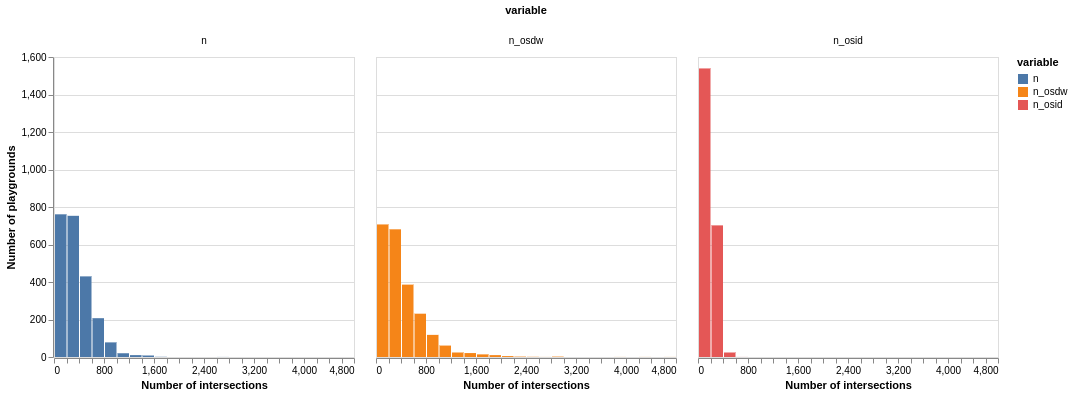

In [44]:
# Visualizing the number of intersections for bike paths, walk paths, and driving routes

plot_street_networks(['n', 'n_osdw','n_osid'], 'Number of intersections')

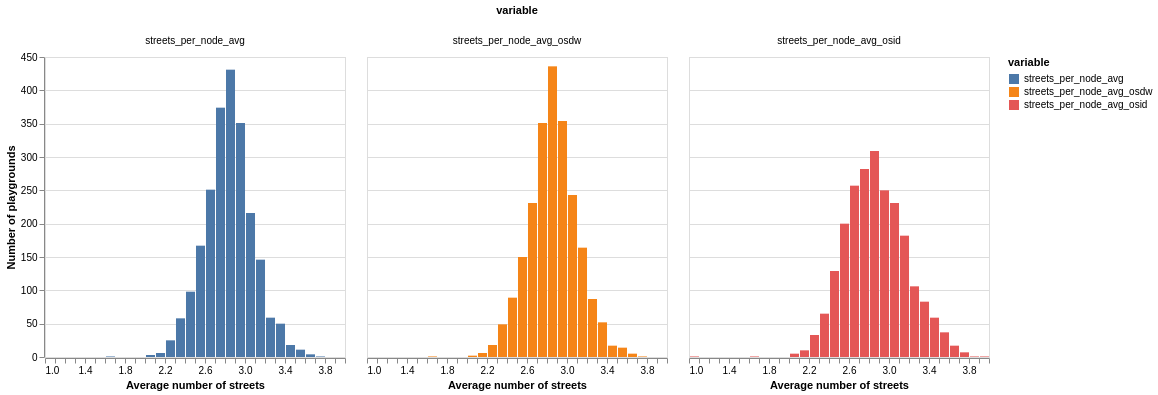

In [45]:
# Visualizing the average number of streets that emanate from each node
# for bike paths, walk paths, and driving routes

plot_street_networks(['streets_per_node_avg', 
                      'streets_per_node_avg_osdw', 
                      'streets_per_node_avg_osid'],'Average number of streets')

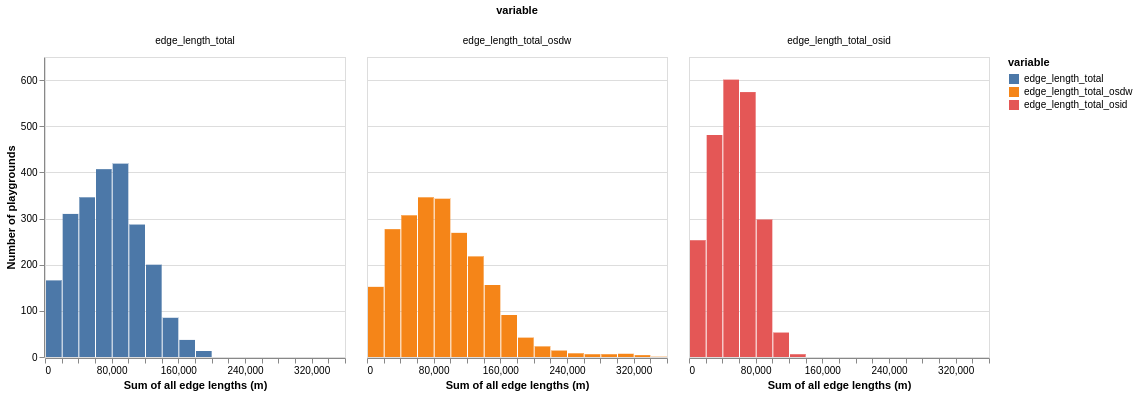

In [46]:
# Visualizing the sum of all edge lengths in the graph, in meters
# for bike paths, walk paths, and driving routes

plot_street_networks(['edge_length_total',
                      'edge_length_total_osdw',
                      'edge_length_total_osid'], 'Sum of all edge lengths (m)')

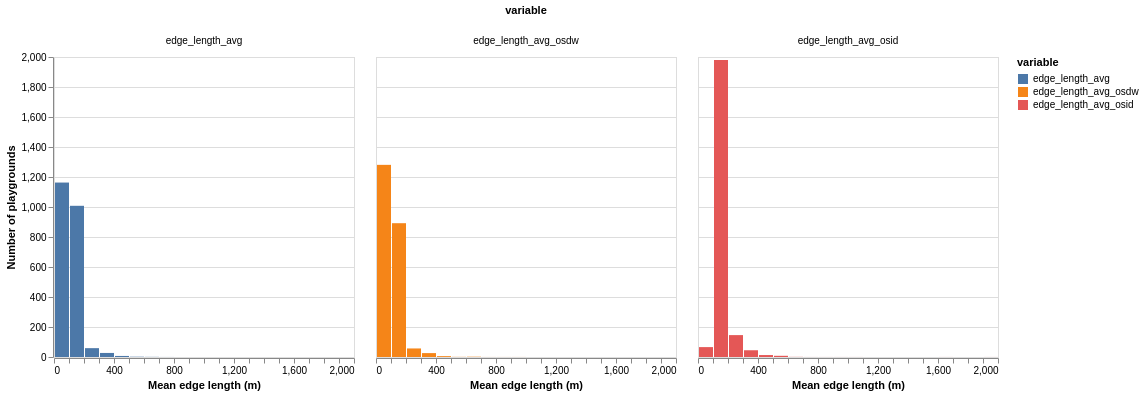

In [47]:
# Visualizing the mean edge length in the graph, in meters
# for bike paths, walk paths, and driving routes

plot_street_networks(['edge_length_avg',
                      'edge_length_avg_osdw',
                      'edge_length_avg_osid'], 'Mean edge length (m)')

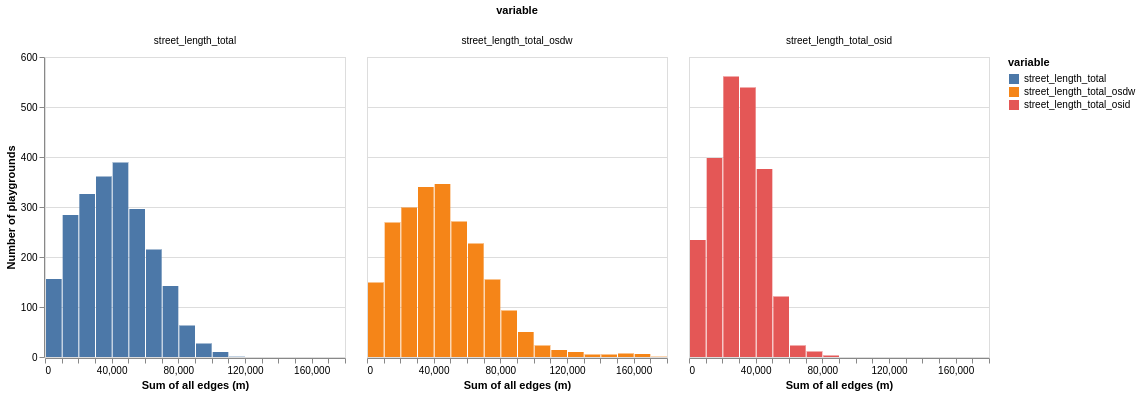

In [48]:
# Visualizing the sum of all edges in the undirected representation, in meters
# for bike paths, walk paths, and driving routes

plot_street_networks(['street_length_total',
                      'street_length_total_osdw',
                      'street_length_total_osid'], 'Sum of all edges (m)')

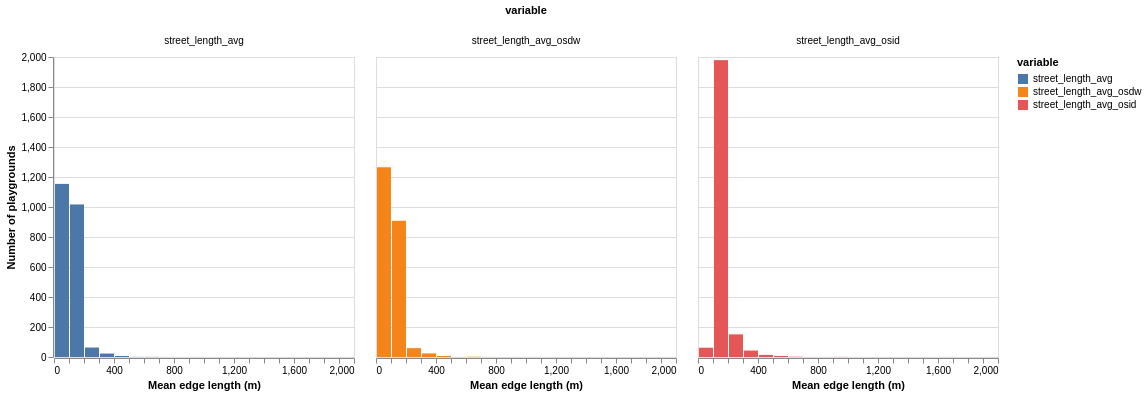

In [66]:
# Visualizing the mean edge length in the undirected representation, in meters
# for bike paths, walk paths, and driving routes

plot_street_networks(['street_length_avg',
                      'street_length_avg_osdw',
                      'street_length_avg_osid'], 'Mean edge length (m)')

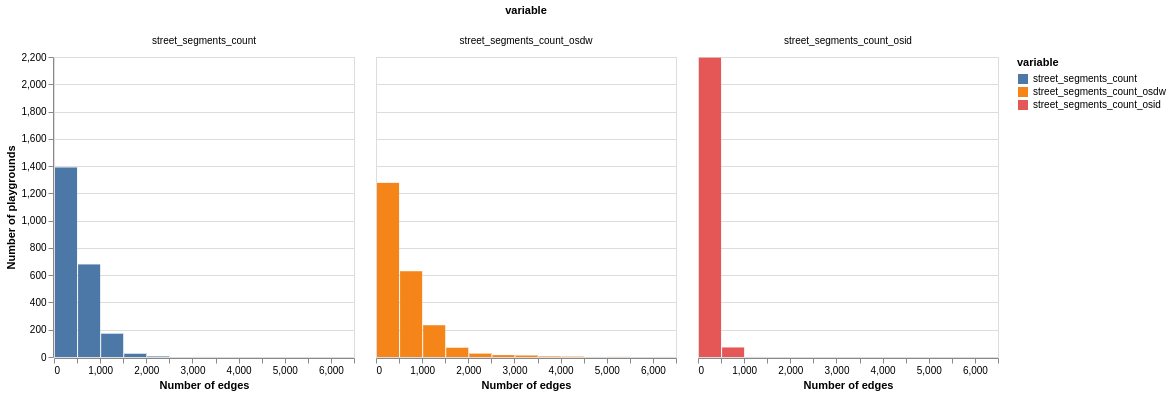

In [67]:
# Visualizing the number of edges in the undirected representation
# for bike paths, walk paths, and driving routes

plot_street_networks(['street_segments_count',
                      'street_segments_count_osdw',
                      'street_segments_count_osid'], 'Number of edges')

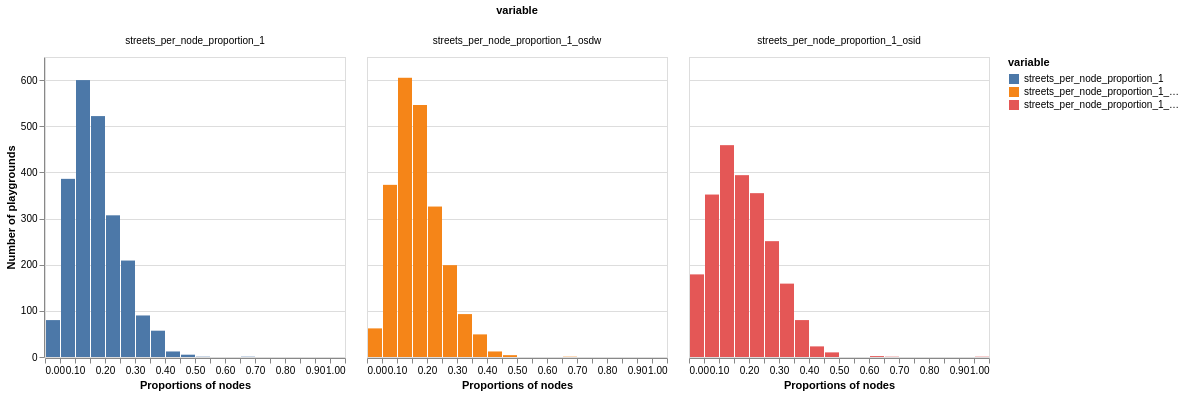

In [68]:
# Counts/proportions of nodes with 1 street emanating from them
# for bike paths, walk paths, and driving routes

plot_street_networks(['streets_per_node_proportion_1',
                      'streets_per_node_proportion_1_osdw',
                      'streets_per_node_proportion_1_osid'], 'Proportions of nodes')

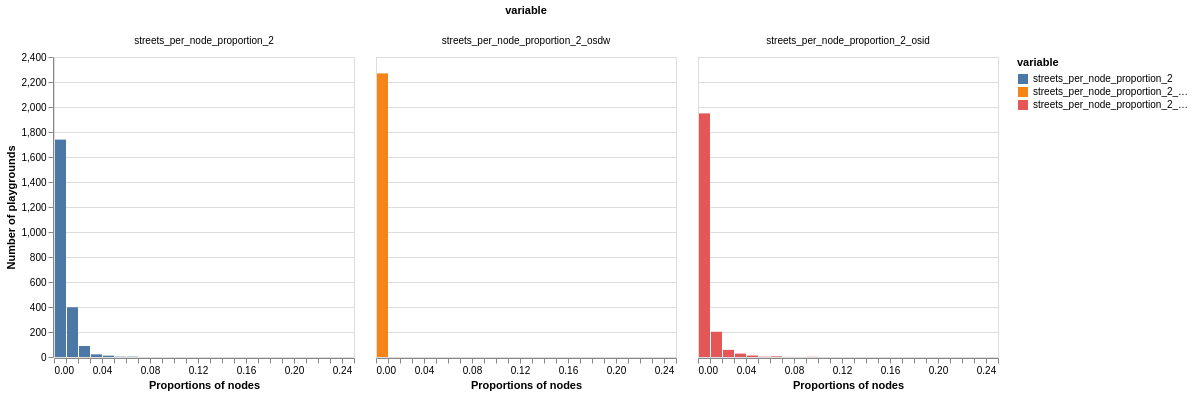

In [69]:
# Counts/proportions of nodes with 2 streets emanating from them
# for bike paths, walk paths, and driving routes
plot_street_networks(['streets_per_node_proportion_2',
                      'streets_per_node_proportion_2_osdw',
                      'streets_per_node_proportion_2_osid'], 'Proportions of nodes')

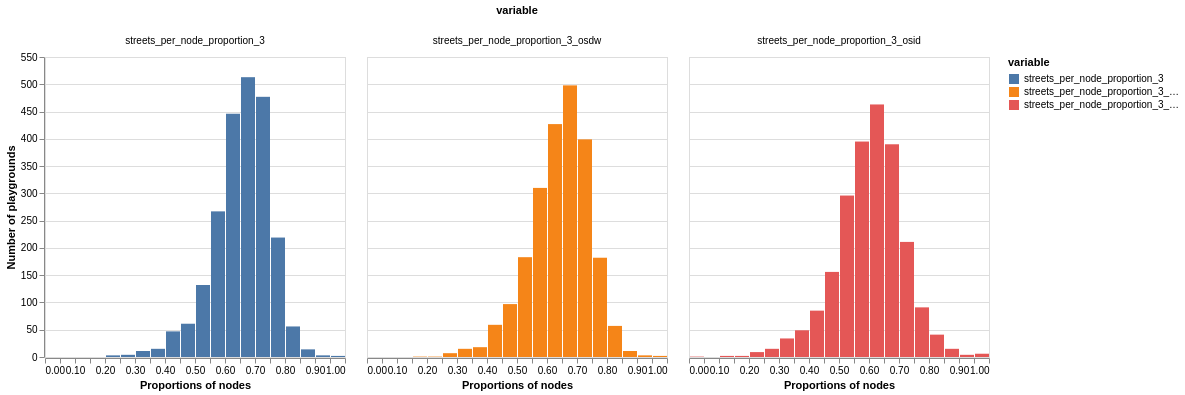

In [70]:
# Counts/proportions of nodes with 3 streets emanating from them
# for bike paths, walk paths, and driving routes
plot_street_networks(['streets_per_node_proportion_3',
                      'streets_per_node_proportion_3_osdw',
                      'streets_per_node_proportion_3_osid'], 'Proportions of nodes')

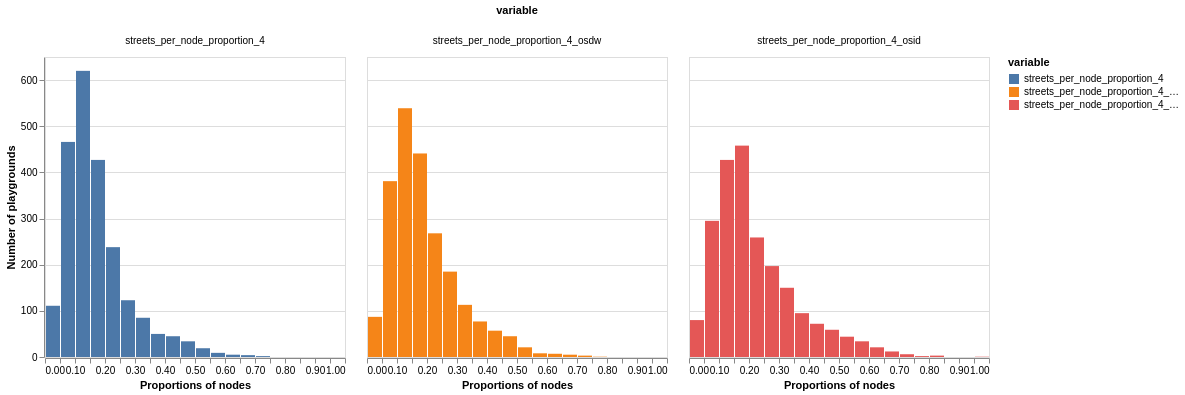

In [71]:
# Counts/proportions of nodes with 4 streets emanating from them
# for bike paths, walk paths, and driving routes
plot_street_networks(['streets_per_node_proportion_4',
                      'streets_per_node_proportion_4_osdw',
                      'streets_per_node_proportion_4_osid'], 'Proportions of nodes')

In [38]:
# Summary of crime rates
df_unique.loc[:, 'violent_crime':'motor_vehicle_theft'].describe()

violent_crime  criminal_homicide         rape      robbery  \
count    2505.000000        2505.000000  2505.000000  2505.000000   
mean      331.798762           4.193613    38.697126    75.633134   
std       326.336004           6.918084    33.381932    90.285153   
min         0.000000           0.000000     0.000000     0.000000   
25%       105.500000           0.000000    15.000000    12.600000   
50%       250.100000           1.800000    31.900000    45.500000   
75%       443.800000           6.000000    54.900000    98.000000   
max      2007.800000         109.300000   332.600000   836.800000   

       aggravated_assault  property_crime     burglary  larceny_theft  \
count         2505.000000     2505.000000  2505.000000    2505.000000   
mean           212.057565     2064.488982   324.918363    1536.409062   
std            228.236959     1430.691573   268.634873    1078.661369   
min              0.000000        0.000000     0.000000       0.000000   
25%             54.900000      980.900000   128.000000     744.300000   
50%            152.700000     1910.000000   275.100000    1410.100000   
75%            283.500000     2870.300000   435.800000    2076.200000   
max           1747.500000    12004.700000  2369.900000    9078.800000   

       motor_vehicle_theft  
count          2505.000000  
mean            206.936846  
std             203.942911  
min               0.000000  
25%              58.900000  
50%             143.600000  
75%             308.800000  
max            1645.700000

*Summary*
- I found 34 columns that were missing data for 90% of rows
    - I'll add these feature names to the Google sheet
- The median count of places of interest near playgrounds is 0 across all establishments
    - Distributions appear to be skewed
    - Perhaps it's possible to infer something from the absence of certain types of businesses. For example, the absence of `alcohol`, `bar`, and `police` might suggest that the playground is located in a family-friendly area.
- 236 playgrounds missing walking network data (592-627); 236 playgrounds missing biking network data (556-591); 240 playgrounds missing driving route data (628-661)
- Some features derived from OSMnx data are linear transformations of one another
- Distribution of crime rates appear to be less skewed

*Suggested to-do list*
- Look at correlations between explanatory and response variables

In [57]:
neigh_desc = df_neigh.describe().T
neigh_desc["session_corr"] = df_neigh.corr().unacast_session_count
neigh_desc["CoV"] = (neigh_desc["std"])/neigh_desc["mean"]
# neigh_desc['zero'] = zero_val
# neigh_desc['null'] = null_val

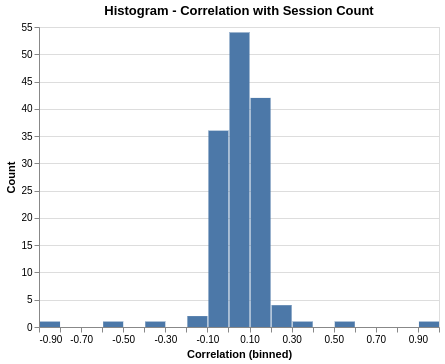

In [52]:
alt.Chart(neigh_desc).mark_bar().encode(
    alt.X("session_corr:Q", bin=alt.Bin(maxbins=30),title="Correlation (binned)"),
    y=alt.Y('count()', title="Count")).properties(
    title='Histogram - Correlation with Session Count'
)

In [58]:
neigh_desc.sort_values(by="CoV", ascending=False)

count      mean       std  min  25%  \
camp_site                           50120.0  0.005188  0.091396  0.0  0.0   
streets_per_node_proportion_2_osdw  45400.0  0.000020  0.000310  0.0  0.0   
childcare                           50120.0  0.006784  0.086810  0.0  0.0   
streets_per_node_counts_2_osdw      45400.0  0.007930  0.093530  0.0  0.0   
community_centre                    50120.0  0.013966  0.155393  0.0  0.0   
...                                     ...       ...       ...  ...  ...   
street_density_km_osid                  0.0       NaN       NaN  NaN  NaN   
clean_intersection_count_osid           0.0       NaN       NaN  NaN  NaN   
clean_intersection_density_km_osid      0.0       NaN       NaN  NaN  NaN   
streets_per_node_counts_0_osid      45320.0  0.000000  0.000000  0.0  0.0   
streets_per_node_proportion_0_osid  45320.0  0.000000  0.000000  0.0  0.0   

                                    50%  75%       max  session_corr  \
camp_site                           0.0  0.0  3.000000     -0.006473   
streets_per_node_proportion_2_osdw  0.0  0.0  0.010417     -0.002615   
childcare                           0.0  0.0  2.000000      0.096826   
streets_per_node_counts_2_osdw      0.0  0.0  2.000000      0.000697   
community_centre                    0.0  0.0  4.000000      0.133017   
...                                 ...  ...       ...           ...   
street_density_km_osid              NaN  NaN       NaN           NaN   
clean_intersection_count_osid       NaN  NaN       NaN           NaN   
clean_intersection_density_km_osid  NaN  NaN       NaN           NaN   
streets_per_node_counts_0_osid      0.0  0.0  0.000000           NaN   
streets_per_node_proportion_0_osid  0.0  0.0  0.000000           NaN   

                                          CoV  
camp_site                           17.618247  
streets_per_node_proportion_2_osdw  15.634859  
childcare                           12.796781  
streets_per_node_counts_2_osdw      11.795191  
community_centre                    11.126142  
...                                       ...  
street_density_km_osid                    NaN  
clean_intersection_count_osid             NaN  
clean_intersection_density_km_osid        NaN  
streets_per_node_counts_0_osid            NaN  
streets_per_node_proportion_0_osid        NaN  

[170 rows x 10 columns]

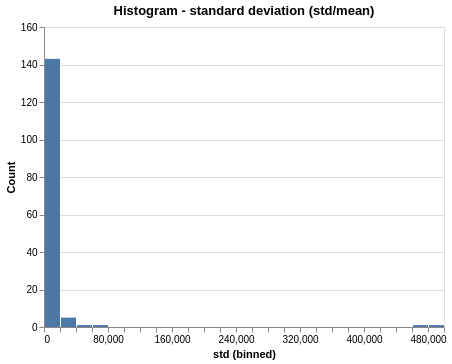

In [61]:
alt.Chart(neigh_desc).mark_bar().encode(
    alt.X("std:Q", bin=alt.Bin(maxbins=30)),
    y=alt.Y('count()', title="Count")).properties(
    title='Histogram - standard deviation (std/mean)'
)


In [64]:
neigh_desc.query('std > 200000')

count          mean            std    min      25%       50%  \
distance_to_O  46180.0  76058.296748  470002.887858  24.42  4218.23  10926.63   
distance_to_U  46180.0  72425.024786  484357.154691  36.31  1013.76   3516.78   

                    75%         max  session_corr       CoV  
distance_to_O  22586.84  3776539.49      0.032987  6.179508  
distance_to_U  10440.86  3906134.56      0.033962  6.687704

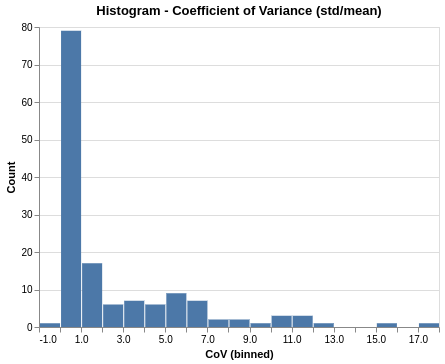

In [59]:
alt.Chart(neigh_desc).mark_bar().encode(
    alt.X("CoV:Q", bin=alt.Bin(maxbins=30)),
    y=alt.Y('count()', title="Count")).properties(
    title='Histogram - Coefficient of Variance (std/mean)'
)


In [65]:
neigh_desc.query('CoV > 14')

count      mean       std  min  25%  \
camp_site                           50120.0  0.005188  0.091396  0.0  0.0   
streets_per_node_proportion_2_osdw  45400.0  0.000020  0.000310  0.0  0.0   

                                    50%  75%       max  session_corr  \
camp_site                           0.0  0.0  3.000000     -0.006473   
streets_per_node_proportion_2_osdw  0.0  0.0  0.010417     -0.002615   

                                          CoV  
camp_site                           17.618247  
streets_per_node_proportion_2_osdw  15.634859